Below table represents current home prices based on square feet area 

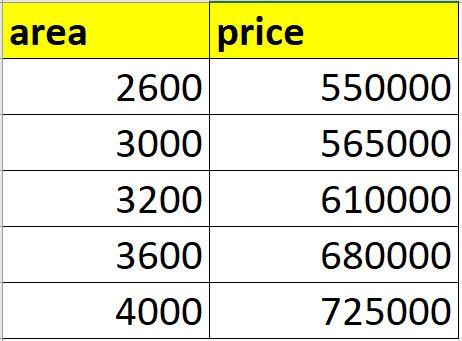

In [1]:
from IPython.display import Image
Image("./homepricetable.jpeg")


**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


Home prices can be presented as following equation:


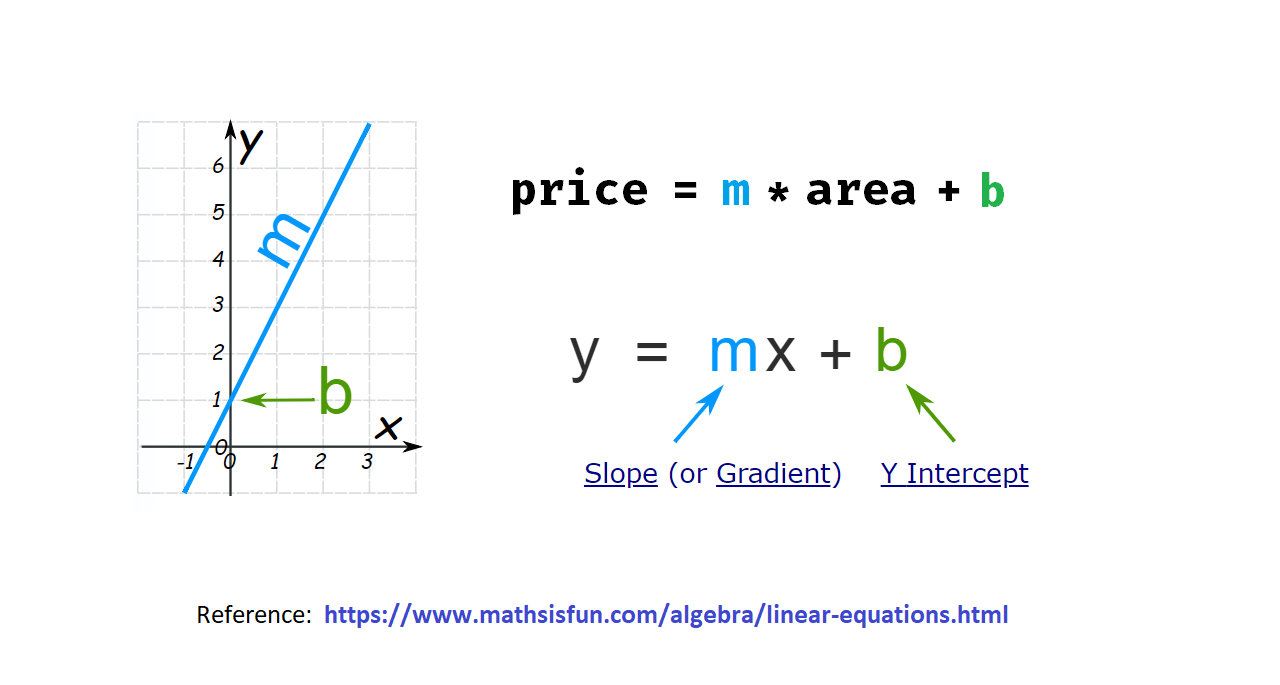

In [2]:
Image("./linear_equation.png")

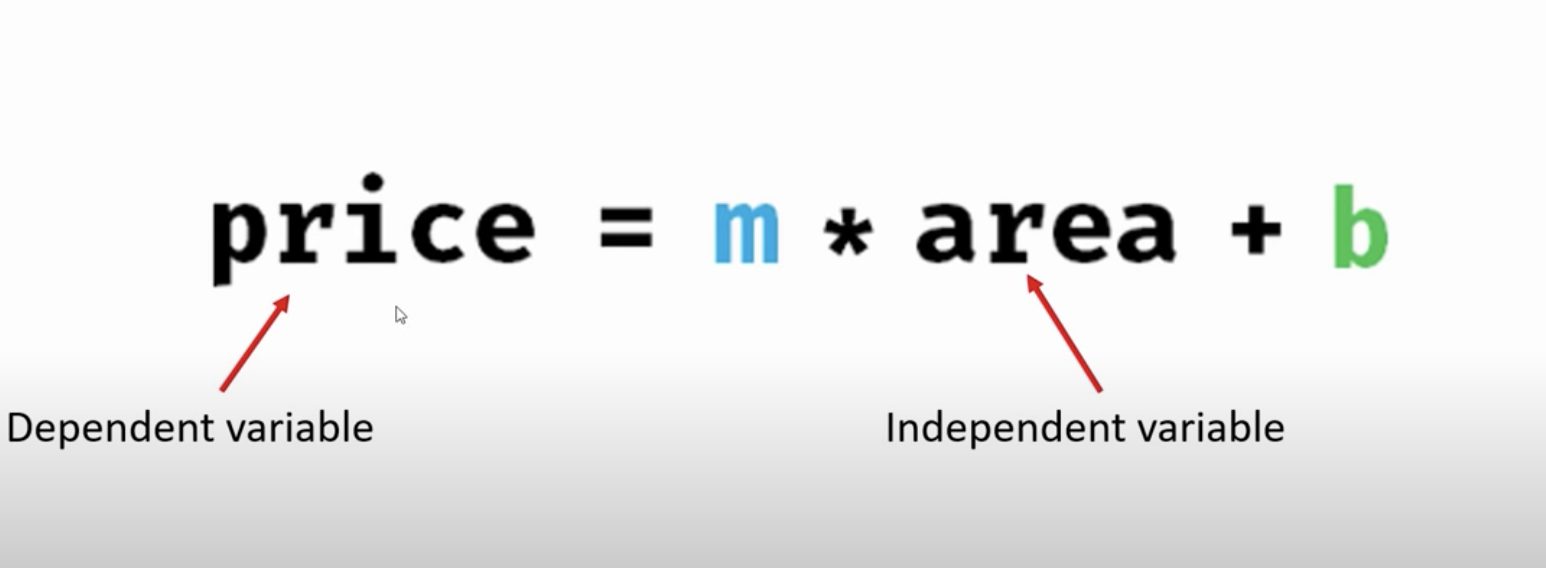

In [3]:
Image("./fnc.png")

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


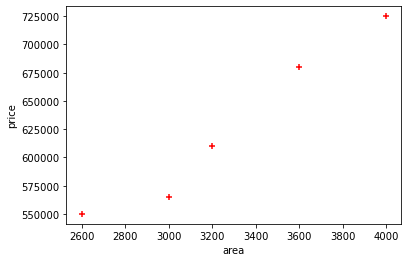

In [6]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [7]:

new_df = df.drop('price',axis='columns')
new_df


,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [9]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [10]:
# predict the price of a house with the inputted arrea
reg.predict([[2660]])

array([541811.64383562])

The model calculated the values of m and b using the formula:
    **home price = m * (area) + b**

In [11]:
# m(sloap) is:
reg.coef_

array([135.78767123])

In [12]:
# b(intercept) is :
reg.intercept_


180616.43835616432

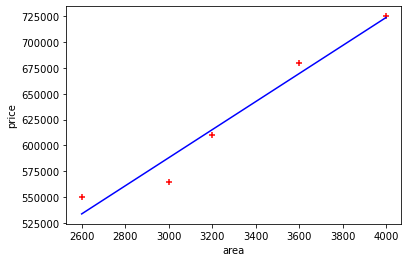

In [23]:
# the visual representation of the linear equation
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]), color='blue')

In [13]:
# Let's manually check if the value of the model is correct: 
# y = m*x + b
135.78767123 * 2660 + 180616.43835616432

541811.6438279643

**Now let's feed the model a list of arreas and try to predict the prices**


In [14]:
area_df = pd.read_csv("./area.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [15]:
# Now let's predict based on the previous model what are the prices for houses in this arreas
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
area_df['prices']=p
area_df


,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [17]:
area_df.to_csv("prediction.csv",index=False)
